## AI Project UCS415 
#### Finding Popularity of Spotify Songs
Predicting which songs will have a popularity score over 72.5 using KNN 

Nitansh Jain  102017025

In [1885]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [1886]:
spotify_df = pd.read_csv('spotify_data.csv')
spotify_df.head()

,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,top year,artist_type,pop
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,2010,Duo,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,2010,Duo,68
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,2010,Solo,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,2010,Solo,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,2010,Solo,79


In [1887]:
# checking if any null values are present
print(spotify_df.isnull().sum())

title          0
artist         0
top genre      0
year           0
added          0
bpm            0
nrgy           0
dnce           0
dB             0
live           0
val            0
dur            0
acous          0
spch           0
top year       0
artist_type    0
pop            0
dtype: int64


In [1888]:
spotify_df.dtypes

title          object
artist         object
top genre      object
year            int64
added          object
bpm             int64
nrgy            int64
dnce            int64
dB              int64
live            int64
val             int64
dur             int64
acous           int64
spch            int64
top year        int64
artist_type    object
pop             int64
dtype: object

In [1889]:
# converting artist type column values to a number [0,1,2]
print(spotify_df['artist_type'].value_counts())
spotify_df['artist_type'] = spotify_df['artist_type'].astype('category').cat.codes
print(spotify_df['artist_type'].value_counts())

Solo          748
Band/Group    168
Duo            70
Trio           13
Name: artist_type, dtype: int64
2    748
0    168
1     70
3     13
Name: artist_type, dtype: int64


In [1890]:
# converting name of column top genre to genre
spotify_df = spotify_df.rename(columns={'top genre': 'genre', 'pop': 'popularity'})
spotify_df.head()

,title,artist,genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,top year,artist_type,popularity
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,2010,1,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,2010,1,68
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,2010,2,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,2010,2,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,2010,2,79


In [1891]:
# getting columns from spotify_df from bpm to artist_type via loc
spotify_features = spotify_df

# dropping column added and top year from dataframe
spotify_features.drop(['title', 'artist', 'genre', 'added', 'year', 'top year', 'artist_type'], axis=1, inplace=True)
spotify_df.head()


,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,140,81,61,-6,23,23,203,0,6,70
1,138,89,68,-4,36,83,192,1,8,68
2,95,48,84,-7,9,96,243,20,3,72
3,93,87,66,-4,4,38,180,11,12,80
4,104,85,69,-6,9,74,268,39,5,79


In [1892]:
# checking correlation table
spotify_features.head()
spotify_features.corr(method='pearson')

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
bpm,1.000000,0.120413,-0.110106,0.091673,0.014285,0.022279,-0.019559,-0.125350,0.149920,-0.025281
nrgy,0.120413,1.000000,-0.133745,0.712318,0.185270,0.371417,-0.043786,-0.503696,-0.100989,-0.233965
dnce,-0.110106,-0.133745,1.000000,-0.045303,-0.112625,0.262842,-0.162642,-0.074588,0.160960,0.093914
dB,0.091673,0.712318,-0.045303,1.000000,0.129418,0.315341,-0.075963,-0.391791,-0.167420,-0.145215
live,0.014285,0.185270,-0.112625,0.129418,1.000000,0.028707,-0.004641,-0.116467,0.043775,-0.137434
val,0.022279,0.371417,0.262842,0.315341,0.028707,1.000000,-0.182705,-0.163256,0.012497,-0.003437
dur,-0.019559,-0.043786,-0.162642,-0.075963,-0.004641,-0.182705,1.000000,0.024095,-0.033816,0.008445
acous,-0.125350,-0.503696,-0.074588,-0.391791,-0.116467,-0.163256,0.024095,1.000000,-0.009797,0.128051
spch,0.149920,-0.100989,0.160960,-0.167420,0.043775,0.012497,-0.033816,-0.009797,1.000000,0.061587
popularity,-0.025281,-0.233965,0.093914,-0.145215,-0.137434,-0.003437,0.008445,0.128051,0.061587,1.000000


In [1893]:
# splitting spotify_features into dependent and independent variables
spotify_features_x = spotify_features.drop(['popularity'], axis=1)
spotify_features_y = spotify_features['popularity']

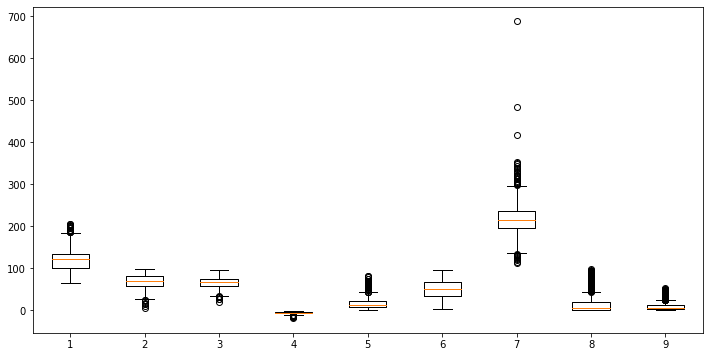

In [1894]:
# Visulaizing the data before normalization
fig = plt.figure(figsize=(12,6))
plt.boxplot(spotify_features_x)
plt.show()

In [1895]:
# normalizing spotify_features using min_max scaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
spotify_features_scaled_x = scaler.fit_transform(spotify_features_x)
spotify_features_scaled_x[0:2]

array([[ 0.7152911 ,  0.71974499, -0.45094756, -0.16893356,  0.379378  ,
        -1.29628842, -0.43503584, -0.73806936, -0.43869671],
       [ 0.63903715,  1.22181376,  0.08372119,  0.8208883 ,  1.34735092,
         1.48854108, -0.71209228, -0.68665156, -0.22307161]])

10


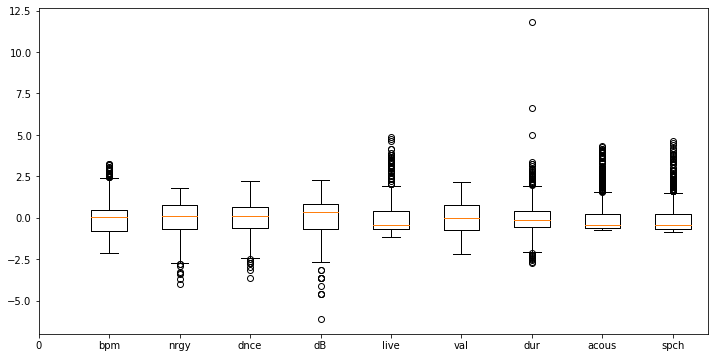

In [1896]:
# after normalization of data using min_max scaler
xticks_values = [0, 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']
print(len(xticks_values))
fig = plt.figure(figsize=(12,6))
plt.boxplot(spotify_features_scaled_x)
plt.xticks(range(0,len(xticks_values)), xticks_values)
plt.show()


In [1897]:
spotify_features_x_np = spotify_features_scaled_x[:,:]
print(spotify_features_x_np[0:2])

[[ 0.7152911   0.71974499 -0.45094756 -0.16893356  0.379378   -1.29628842
  -0.43503584 -0.73806936 -0.43869671]
 [ 0.63903715  1.22181376  0.08372119  0.8208883   1.34735092  1.48854108
  -0.71209228 -0.68665156 -0.22307161]]


In [1898]:
spotify_features_y = np.where(spotify_features_y >= 74, 1, 0)
spotify_features_y[0:5]

array([0, 0, 0, 1, 1])

In [1899]:
spotify_features_scaled_y = scaler.fit_transform(spotify_features_y.reshape(-1,1))
spotify_features_scaled_y[0:2]

spotify_features_y_np = spotify_features_y
spotify_features_y_np[0:5]

array([0, 0, 0, 1, 1])

In [1900]:
print(spotify_features_x_np[0:2])
print(spotify_features_y_np[0:2])


[[ 0.7152911   0.71974499 -0.45094756 -0.16893356  0.379378   -1.29628842
  -0.43503584 -0.73806936 -0.43869671]
 [ 0.63903715  1.22181376  0.08372119  0.8208883   1.34735092  1.48854108
  -0.71209228 -0.68665156 -0.22307161]]
[0 0]


In [1901]:
from sklearn.model_selection import train_test_split
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(spotify_features_x_np, spotify_features_y_np, test_size=0.33, random_state=42)


In [1902]:
from sklearn.neighbors import KNeighborsClassifier
n = KNeighborsClassifier(n_neighbors=13).fit(x_train_knn, y_train_knn)
n

KNeighborsClassifier(n_neighbors=13)

In [1903]:
yhat_pred_knn = n.predict(x_test_knn)
print(yhat_pred_knn[0:10])
print(y_test_knn[0:10])

[1 1 0 1 1 0 1 0 1 0]
[1 1 0 0 1 1 1 0 0 0]


In [1904]:
from sklearn import metrics
metrics.accuracy_score(y_test_knn, yhat_pred_knn)

0.6454545454545455

In [1905]:
ks = 30
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for n in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train_knn,y_train_knn)
    yhat = neigh.predict(x_test_knn)
    mean_acc[n-1] = metrics.accuracy_score(y_test_knn,yhat)
    std_acc[n-1] = np.std(yhat==y_test_knn)/np.sqrt(yhat.shape[0])
print(mean_acc)
print(np.where(mean_acc == np.max(mean_acc)))

[0.55757576 0.52424242 0.57272727 0.55454545 0.58787879 0.58484848
 0.63636364 0.61818182 0.64242424 0.60606061 0.62727273 0.61818182
 0.64545455 0.63939394 0.64242424 0.62121212 0.63636364 0.63333333
 0.63333333 0.63636364 0.64545455 0.63636364 0.62424242 0.62727273
 0.64242424 0.63939394 0.63333333 0.63030303 0.63939394]
(array([12, 20]),)


In [1906]:
cm_knn = confusion_matrix(y_test_knn, yhat_pred_knn)
print(cm_knn)

[[ 40  84]
 [ 33 173]]


In [1907]:
print('Classification Report: \n', metrics.classification_report(y_test_knn, yhat_pred_knn))

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.32      0.41       124
           1       0.67      0.84      0.75       206

    accuracy                           0.65       330
   macro avg       0.61      0.58      0.58       330
weighted avg       0.63      0.65      0.62       330



In [1908]:
error_rate = []
for i in range(1,40):
    Obj = KNeighborsClassifier(n_neighbors = i)
    Obj.fit(x_train_knn,y_train_knn)
    pred_i = Obj.predict(x_test_knn)
    error_rate.append(np.mean(pred_i != y_test_knn))


Text(0, 0.5, 'Error Rate')

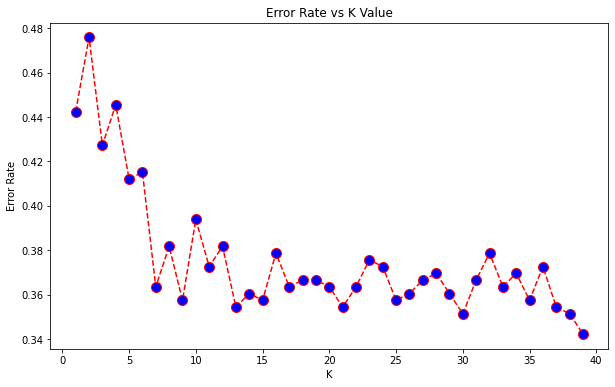

In [1909]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [1910]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn, spotify_features_x_np, spotify_features_y_np, cv=10)
scores

array([0.62      , 0.57      , 0.55      , 0.55      , 0.55      ,
       0.67      , 0.62      , 0.62      , 0.6       , 0.62626263])

In [1911]:
print('%.2f accuracy with a standard deviation of %.2f' % (np.mean(scores), np.std(scores)))

0.60 accuracy with a standard deviation of 0.04


In [1912]:
from sklearn.model_selection import cross_val_predict
yhat_pred_knn_cross_val = cross_val_predict(knn, spotify_features_x_np, spotify_features_y_np, cv=10)

In [1913]:
metrics.accuracy_score(spotify_features_y, yhat_pred_knn_cross_val)

0.5975975975975976

In [1914]:
cm_cross_val_score = confusion_matrix(spotify_features_y, yhat_pred_knn_cross_val)
print(cm_cross_val_score)

[[127 256]
 [146 470]]


In [1915]:
print('Classification Report: \n', metrics.classification_report(spotify_features_y, yhat_pred_knn_cross_val))

Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.33      0.39       383
           1       0.65      0.76      0.70       616

    accuracy                           0.60       999
   macro avg       0.56      0.55      0.54       999
weighted avg       0.58      0.60      0.58       999

